In [ ]:
import os
from google.colab import userdata
os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [2]:
!nvidia-smi

Thu Mar  6 12:23:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 73.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="58BX6EZLXZvWhy5sZjLn")
project = rf.workspace("intel-challenge").project("stamp-detection-pho4c")
version = project.version(1)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to STAMP-DETECTION-1 in yolov12:: 100%|██████████| 3102/3102 [00:00<00:00, 5154.84it/s]


In [8]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


**NOTE:** We need to make a few changes to our downloaded dataset so it will work with YOLOv12. Run the following bash commands to prepare your dataset for training by updating the relative paths in the `data.yaml` file, ensuring it correctly points to the subdirectories for your dataset's `train`, `test`, and `valid` subsets.

In [9]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [10]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['stamp']

roboflow:
  workspace: intel-challenge
test: ../test/images
train: ../train/images
val: ../valid/images


## Fine-tune YOLOv12 model



In [ ]:
from ultralytics import YOLO
model = YOLO('yolov12s.yaml')
results = model.train(data=f'{dataset.location}/data.yaml', epochs=100)

New https://pypi.org/project/ultralytics/8.3.84 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/STAMP-DETECTION-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.34M/5.34M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/STAMP-DETECTION-1/train/labels... 1422 images, 11 backgrounds, 0 corrupt: 100%|██████████| 1422/1422 [00:00<00:00, 2425.56it/s]


train: New cache created: /content/STAMP-DETECTION-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/STAMP-DETECTION-1/valid/labels... 82 images, 0 backgrounds, 0 corrupt: 100%|██████████| 82/82 [00:00<00:00, 960.05it/s]

val: New cache created: /content/STAMP-DETECTION-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/89 [00:00<?, ?it/s]Memory Efficient attention defaults to a non-deterministic algorithm. To explicitly enable determinism call torch.use_deterministic_algorithms(True, warn_only=False). (Triggered internally at ../aten/src/ATen/native/transformers/cuda/attention_backward.cu:655.)
      1/100      4.91G      3.399      4.081        4.1         24        640: 100%|██████████| 89/89 [00:38<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         82        137    0.00179      0.321     0.0017   0.000458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       4.8G      2.749      2.842      3.164         27        640: 100%|██████████| 89/89 [00:34<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]


                   all         82        137     0.0272      0.226       0.02    0.00686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.8G      2.427      2.213      2.785         38        640: 100%|██████████| 89/89 [00:32<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         82        137      0.364      0.285      0.229     0.0774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       4.8G      2.275      2.003      2.612         26        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         82        137      0.232     0.0876     0.0517     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.81G      2.113      1.752      2.455         40        640: 100%|██████████| 89/89 [00:32<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]


                   all         82        137      0.717      0.504      0.545      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.81G      1.993      1.619      2.322         48        640: 100%|██████████| 89/89 [00:32<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]


                   all         82        137      0.716      0.328      0.407      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.82G      1.954      1.542      2.255         39        640: 100%|██████████| 89/89 [00:33<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]


                   all         82        137      0.854      0.606      0.718      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       4.8G      1.863      1.454      2.172         37        640: 100%|██████████| 89/89 [00:32<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         82        137      0.796      0.679      0.718      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.81G       1.83      1.431      2.138         35        640: 100%|██████████| 89/89 [00:32<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         82        137      0.779      0.745      0.782      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.81G      1.809      1.423      2.106         35        640: 100%|██████████| 89/89 [00:31<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         82        137      0.849      0.745       0.78      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.82G      1.768      1.375      2.064         40        640: 100%|██████████| 89/89 [00:32<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         82        137      0.861       0.73      0.769      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       4.8G      1.716      1.342      2.017         36        640: 100%|██████████| 89/89 [00:32<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


                   all         82        137      0.867      0.774      0.849      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.82G      1.732      1.315      2.037         32        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         82        137      0.819      0.759      0.779      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.81G      1.717      1.302       2.01         41        640: 100%|██████████| 89/89 [00:33<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         82        137      0.843      0.782      0.829      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.82G       1.68      1.252      1.983         32        640: 100%|██████████| 89/89 [00:32<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]


                   all         82        137       0.86      0.701      0.767      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.8G      1.665      1.277      1.969         33        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         82        137      0.756      0.715      0.765       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.81G      1.635      1.228      1.937         37        640: 100%|██████████| 89/89 [00:32<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         82        137      0.745      0.672      0.737      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.81G      1.651      1.261      1.938         37        640: 100%|██████████| 89/89 [00:32<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         82        137      0.884      0.781      0.862      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.81G      1.652      1.261      1.941         25        640: 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         82        137      0.871      0.796      0.848      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       4.8G      1.634      1.252      1.923         35        640: 100%|██████████| 89/89 [00:32<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all         82        137      0.857      0.752       0.82      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.81G      1.603      1.237       1.89         25        640: 100%|██████████| 89/89 [00:33<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         82        137      0.835      0.814      0.857      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.81G      1.626      1.199      1.922         38        640: 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         82        137      0.791      0.752      0.768      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.82G      1.592      1.217      1.875         35        640: 100%|██████████| 89/89 [00:32<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         82        137      0.857      0.774      0.816      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       4.8G      1.587      1.215      1.902         38        640: 100%|██████████| 89/89 [00:32<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]


                   all         82        137      0.836      0.788      0.851      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.82G      1.551      1.189      1.856         27        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         82        137      0.836      0.781      0.861      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.83G      1.538      1.211      1.843         30        640: 100%|██████████| 89/89 [00:32<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         82        137      0.789       0.79      0.786       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.82G      1.558      1.194       1.86         33        640: 100%|██████████| 89/89 [00:33<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         82        137      0.757      0.701      0.724      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       4.8G      1.543      1.197      1.844         25        640: 100%|██████████| 89/89 [00:32<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         82        137      0.818       0.72      0.808      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.81G      1.546      1.194      1.851         44        640: 100%|██████████| 89/89 [00:32<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         82        137      0.819      0.781      0.831      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.81G      1.562      1.187      1.861         44        640: 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         82        137      0.883       0.77      0.839      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.83G      1.542      1.149      1.852         32        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         82        137      0.841      0.775      0.867      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       4.8G      1.563      1.163       1.87         35        640: 100%|██████████| 89/89 [00:32<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         82        137      0.841      0.715      0.824      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.81G      1.523      1.145      1.818         31        640: 100%|██████████| 89/89 [00:32<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         82        137      0.879      0.794      0.867      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.81G      1.513      1.151      1.821         56        640: 100%|██████████| 89/89 [00:32<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         82        137      0.777      0.672       0.73      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.82G       1.53      1.168      1.832         41        640: 100%|██████████| 89/89 [00:32<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         82        137      0.807      0.794      0.825      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       4.8G      1.519      1.168      1.832         29        640: 100%|██████████| 89/89 [00:32<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         82        137      0.865      0.703      0.799      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.82G      1.518      1.125      1.813         33        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         82        137      0.773      0.686      0.688      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.83G      1.499      1.139      1.804         31        640: 100%|██████████| 89/89 [00:32<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         82        137      0.866      0.757      0.817      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.82G      1.479      1.138      1.778         43        640: 100%|██████████| 89/89 [00:32<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         82        137      0.879      0.743      0.828      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       4.8G      1.507      1.132      1.808         29        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         82        137       0.82      0.799      0.851      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.81G      1.497      1.125      1.798         43        640: 100%|██████████| 89/89 [00:33<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         82        137      0.783      0.781      0.851      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.83G      1.497      1.131      1.812         28        640: 100%|██████████| 89/89 [00:32<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]


                   all         82        137        0.8      0.774       0.82      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.81G       1.47       1.12      1.782         30        640: 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         82        137      0.783      0.792      0.837      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       4.8G      1.455       1.08      1.756         33        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         82        137      0.851      0.788      0.858      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.81G      1.484      1.115      1.776         43        640: 100%|██████████| 89/89 [00:32<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         82        137      0.825      0.756      0.846      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.81G      1.496      1.145      1.797         26        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all         82        137      0.866      0.758      0.843      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.82G      1.472      1.145      1.787         26        640: 100%|██████████| 89/89 [00:32<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]


                   all         82        137      0.857      0.781      0.853      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       4.8G      1.447      1.112      1.765         45        640: 100%|██████████| 89/89 [00:33<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         82        137      0.859      0.788      0.858      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.82G      1.455      1.103      1.773         28        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         82        137      0.813      0.761      0.834      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.83G      1.432      1.066      1.736         45        640: 100%|██████████| 89/89 [00:32<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         82        137      0.806      0.758      0.812      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.82G       1.43      1.077      1.731         30        640: 100%|██████████| 89/89 [00:32<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         82        137      0.847      0.767      0.845      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       4.8G      1.426      1.065      1.733         24        640: 100%|██████████| 89/89 [00:32<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         82        137      0.838      0.818      0.875      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.81G      1.416      1.083      1.725         27        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         82        137      0.851      0.781      0.848      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.81G      1.447      1.071      1.746         45        640: 100%|██████████| 89/89 [00:33<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         82        137      0.797      0.775      0.818      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.81G      1.397      1.057       1.71         45        640: 100%|██████████| 89/89 [00:32<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]


                   all         82        137      0.775      0.755      0.783      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       4.8G      1.411      1.052      1.725         30        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         82        137       0.83      0.832      0.862      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.81G      1.422      1.063      1.739         35        640: 100%|██████████| 89/89 [00:31<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         82        137       0.85      0.826      0.873      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.81G       1.41      1.057      1.716         33        640: 100%|██████████| 89/89 [00:32<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         82        137      0.798      0.854      0.863      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.82G      1.419      1.056      1.732         28        640: 100%|██████████| 89/89 [00:32<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         82        137      0.836      0.788      0.836      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       4.8G      1.426      1.066      1.739         43        640: 100%|██████████| 89/89 [00:31<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         82        137      0.852      0.825      0.858      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.82G      1.416       1.05      1.725         40        640: 100%|██████████| 89/89 [00:33<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         82        137      0.877      0.832      0.865      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.81G      1.366      1.028      1.679         34        640: 100%|██████████| 89/89 [00:32<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]


                   all         82        137      0.862      0.818      0.874       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.82G      1.403      1.058      1.732         40        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         82        137      0.837      0.803      0.863      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.83G      1.375      1.017      1.694         34        640: 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         82        137      0.851      0.781      0.843      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.81G      1.399       1.02      1.712         32        640: 100%|██████████| 89/89 [00:32<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]


                   all         82        137      0.779      0.701      0.738      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.81G      1.396      1.061      1.719         36        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         82        137      0.811      0.766      0.798      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.81G      1.366      1.041      1.687         29        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         82        137      0.831      0.781      0.842      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       4.8G      1.369      1.037        1.7         32        640: 100%|██████████| 89/89 [00:32<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         82        137      0.855       0.81      0.874      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.81G      1.377      1.046      1.695         27        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         82        137      0.868      0.813      0.886      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.81G      1.394      1.027      1.713         38        640: 100%|██████████| 89/89 [00:31<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         82        137      0.841      0.812      0.843       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.82G      1.346      1.005      1.666         33        640: 100%|██████████| 89/89 [00:32<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         82        137      0.814      0.854      0.877      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       4.8G       1.36      1.017      1.681         21        640: 100%|██████████| 89/89 [00:32<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         82        137      0.838      0.854      0.884      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.82G      1.355      1.027      1.673         28        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]


                   all         82        137      0.866      0.839      0.879      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.81G      1.361      1.011      1.682         25        640: 100%|██████████| 89/89 [00:32<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]


                   all         82        137      0.841      0.825      0.861      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.82G      1.358      1.024      1.691         30        640: 100%|██████████| 89/89 [00:33<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]


                   all         82        137      0.814      0.818      0.876      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       4.8G      1.372      1.022      1.687         35        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]


                   all         82        137      0.858      0.794      0.857      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.81G      1.359      1.042      1.685         35        640: 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]


                   all         82        137      0.855      0.859      0.882      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.81G      1.352      1.006      1.692         32        640: 100%|██████████| 89/89 [00:32<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         82        137      0.894      0.803      0.886      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.83G      1.339      1.002      1.674         39        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         82        137       0.87      0.847      0.878      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       4.8G      1.348     0.9877      1.683         40        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         82        137      0.848      0.858      0.868      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.81G      1.332     0.9729       1.66         37        640: 100%|██████████| 89/89 [00:32<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         82        137      0.878      0.844      0.874      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.81G      1.337     0.9907      1.658         26        640: 100%|██████████| 89/89 [00:32<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         82        137      0.844      0.854      0.858      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.82G      1.351     0.9822      1.686         31        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         82        137      0.847      0.848      0.858      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       4.8G      1.344     0.9884      1.666         45        640: 100%|██████████| 89/89 [00:32<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         82        137       0.83      0.818      0.867      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.82G      1.344     0.9915      1.667         34        640: 100%|██████████| 89/89 [00:32<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         82        137       0.83      0.869      0.884      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.83G      1.321     0.9546      1.655         32        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         82        137       0.81      0.841      0.855       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.82G      1.332     0.9489       1.66         33        640: 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]


                   all         82        137      0.816      0.843       0.86      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.8G      1.317      0.964      1.644         36        640: 100%|██████████| 89/89 [00:33<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         82        137       0.83      0.854      0.874      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.81G      1.324     0.9615      1.656         27        640: 100%|██████████| 89/89 [00:31<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         82        137      0.853      0.849      0.884      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.81G      1.305     0.9645      1.642         30        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         82        137      0.849      0.869      0.893      0.529


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.81G      1.271     0.8718      1.655         22        640: 100%|██████████| 89/89 [00:33<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         82        137      0.839      0.847      0.896      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       4.8G      1.292     0.8447      1.684         24        640: 100%|██████████| 89/89 [00:32<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]


                   all         82        137       0.81      0.873      0.865      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.81G      1.274     0.8483      1.666         25        640: 100%|██████████| 89/89 [00:31<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         82        137      0.847      0.825      0.873      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.82G      1.268      0.833      1.664         19        640: 100%|██████████| 89/89 [00:31<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         82        137      0.874      0.839      0.897      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.82G      1.256     0.8401      1.643         22        640: 100%|██████████| 89/89 [00:32<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         82        137      0.819      0.862      0.889      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       4.8G      1.254     0.8276      1.648         19        640: 100%|██████████| 89/89 [00:31<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         82        137       0.84      0.876      0.879      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.82G      1.241     0.8167       1.64         24        640: 100%|██████████| 89/89 [00:31<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         82        137      0.863      0.824      0.898      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.81G      1.258      0.833      1.658         22        640: 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         82        137       0.84      0.843      0.887      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.82G      1.228     0.8244       1.63         22        640: 100%|██████████| 89/89 [00:31<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]


                   all         82        137       0.84      0.847      0.893      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       4.8G      1.234     0.8216      1.642         18        640: 100%|██████████| 89/89 [00:31<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         82        137      0.868      0.825      0.892      0.527



100 epochs completed in 0.955 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 352 layers, 9,231,267 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]


                   all         82        137      0.892      0.803      0.886      0.544
Speed: 0.2ms preprocess, 6.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


## Evaluate fine-tuned YOLOv12 model

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		val_batch1_labels.jpg
events.out.tfevents.1741264087.ab5ae2bd2a0c.216.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					   train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					   train_batch8010.jpg	weights
P_curve.png					   train_batch8011.jpg
PR_curve.png					   train_batch8012.jpg


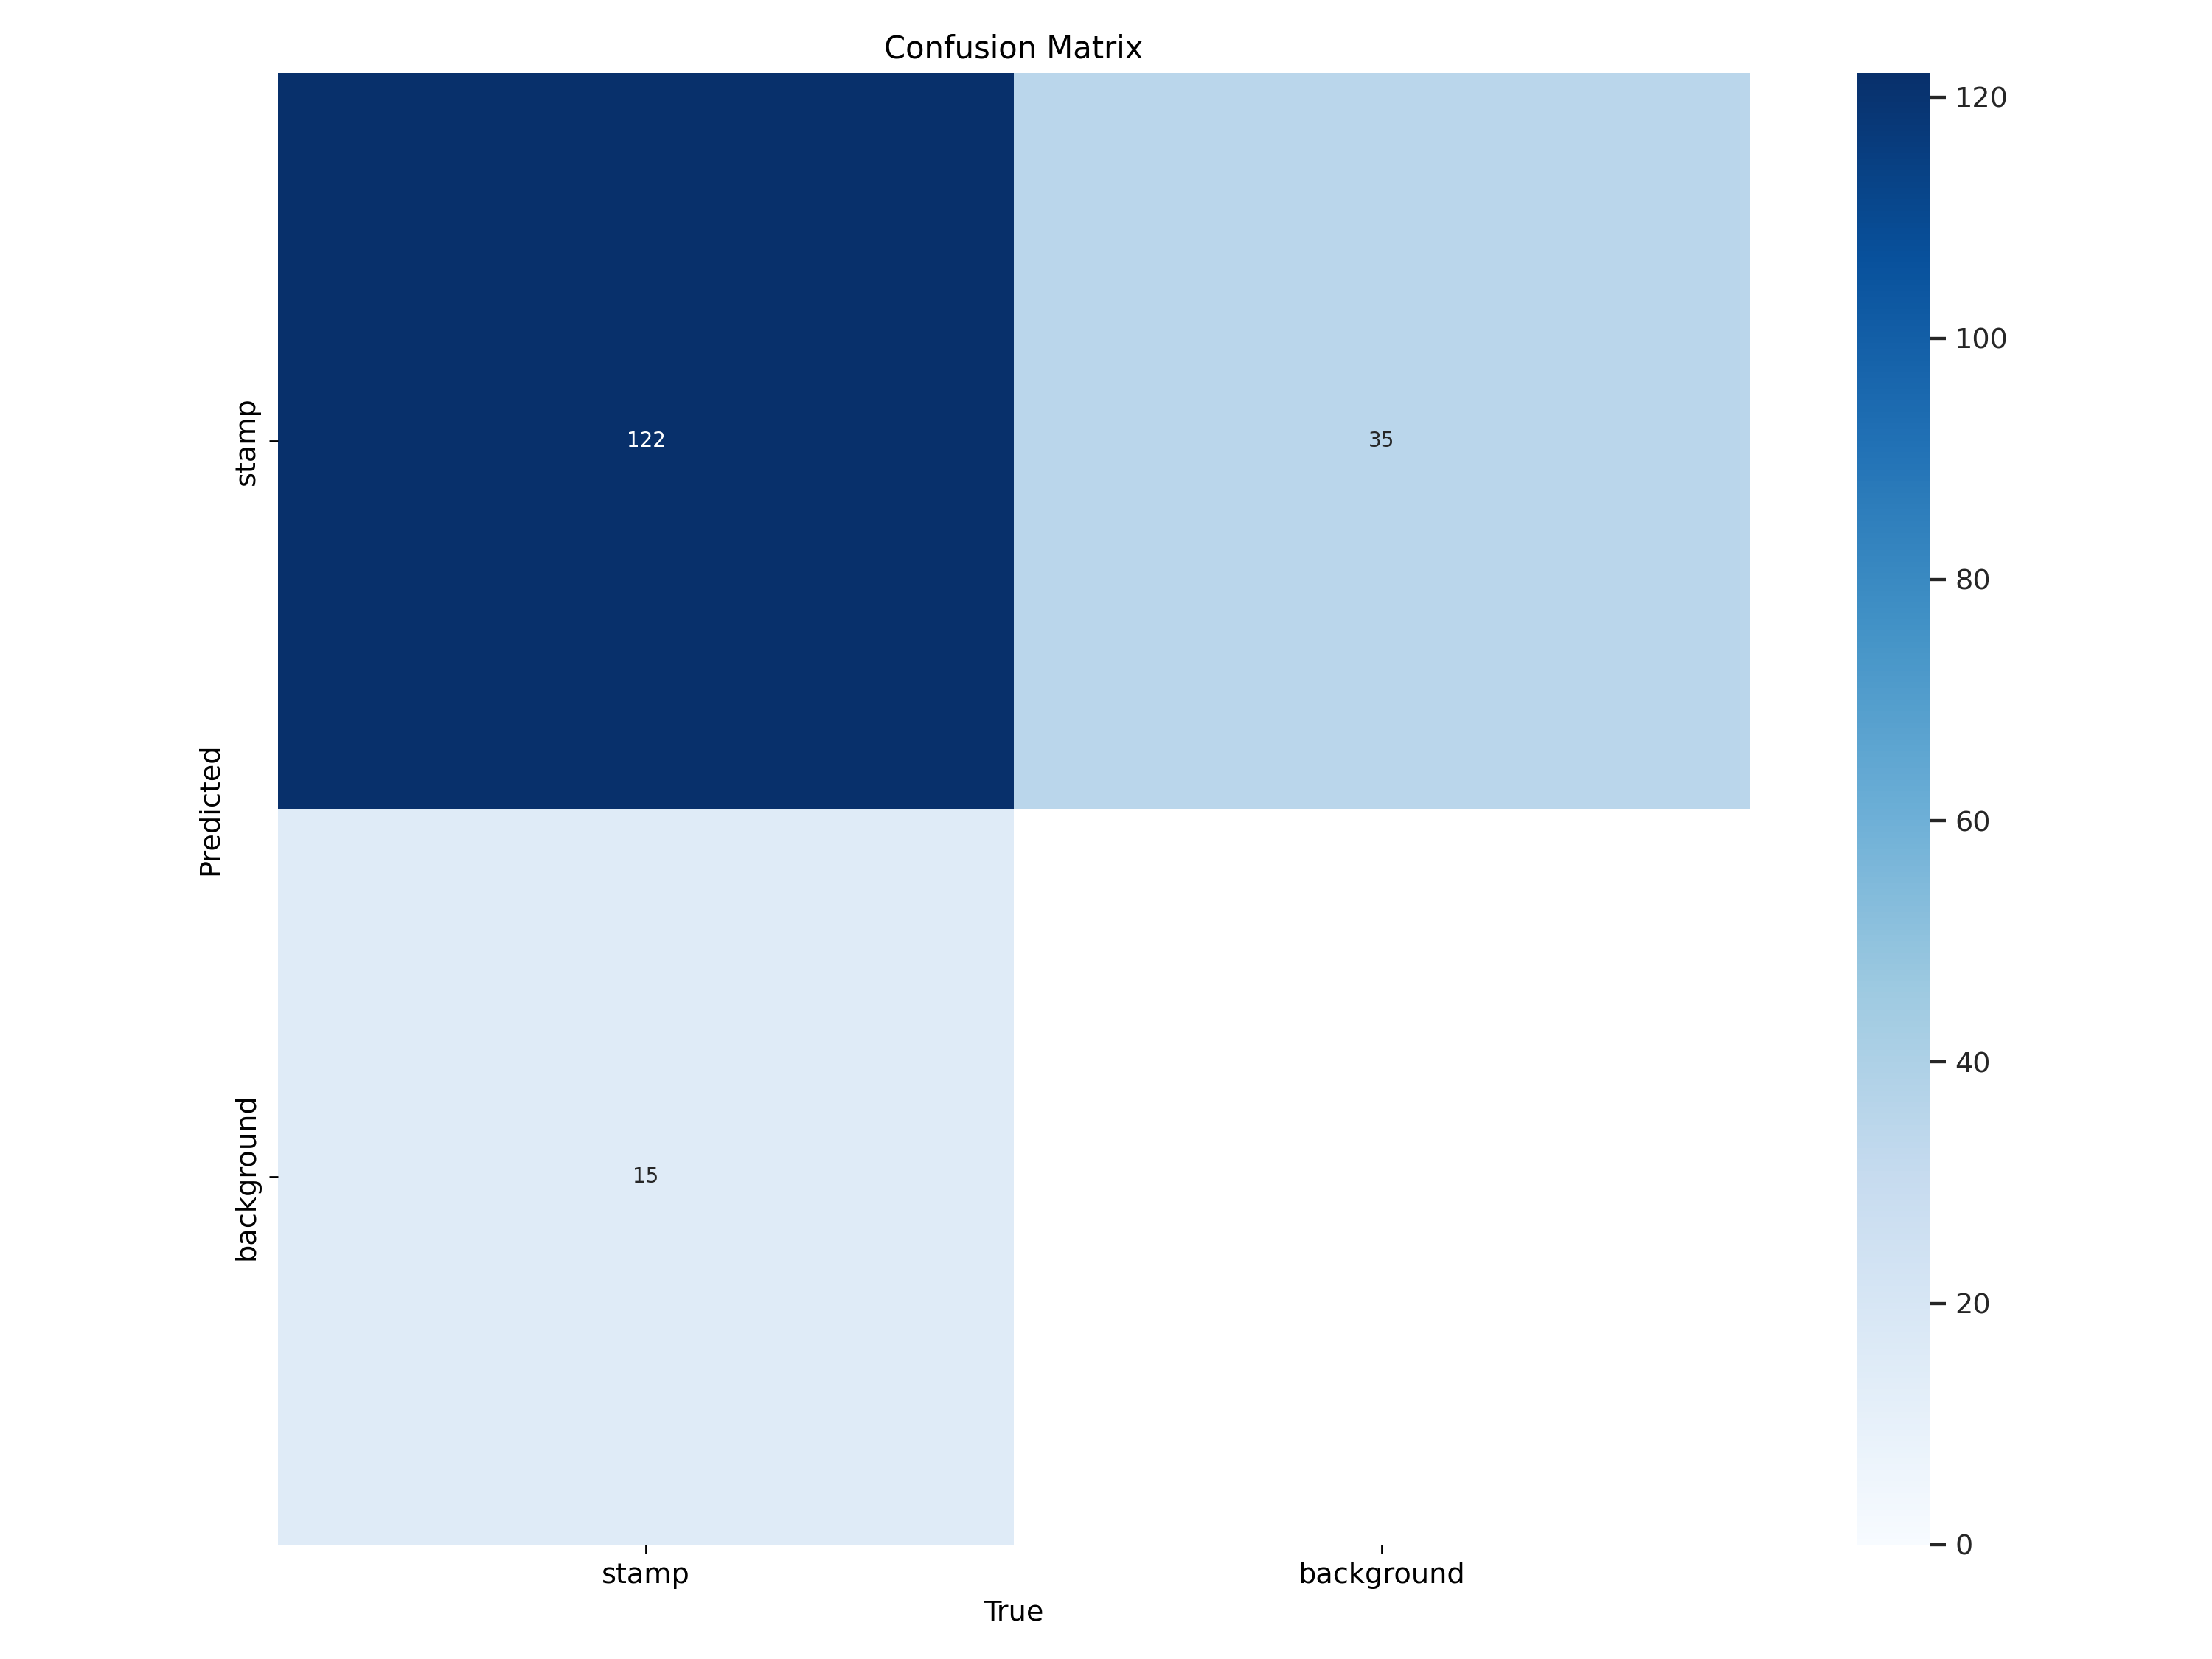

In [13]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

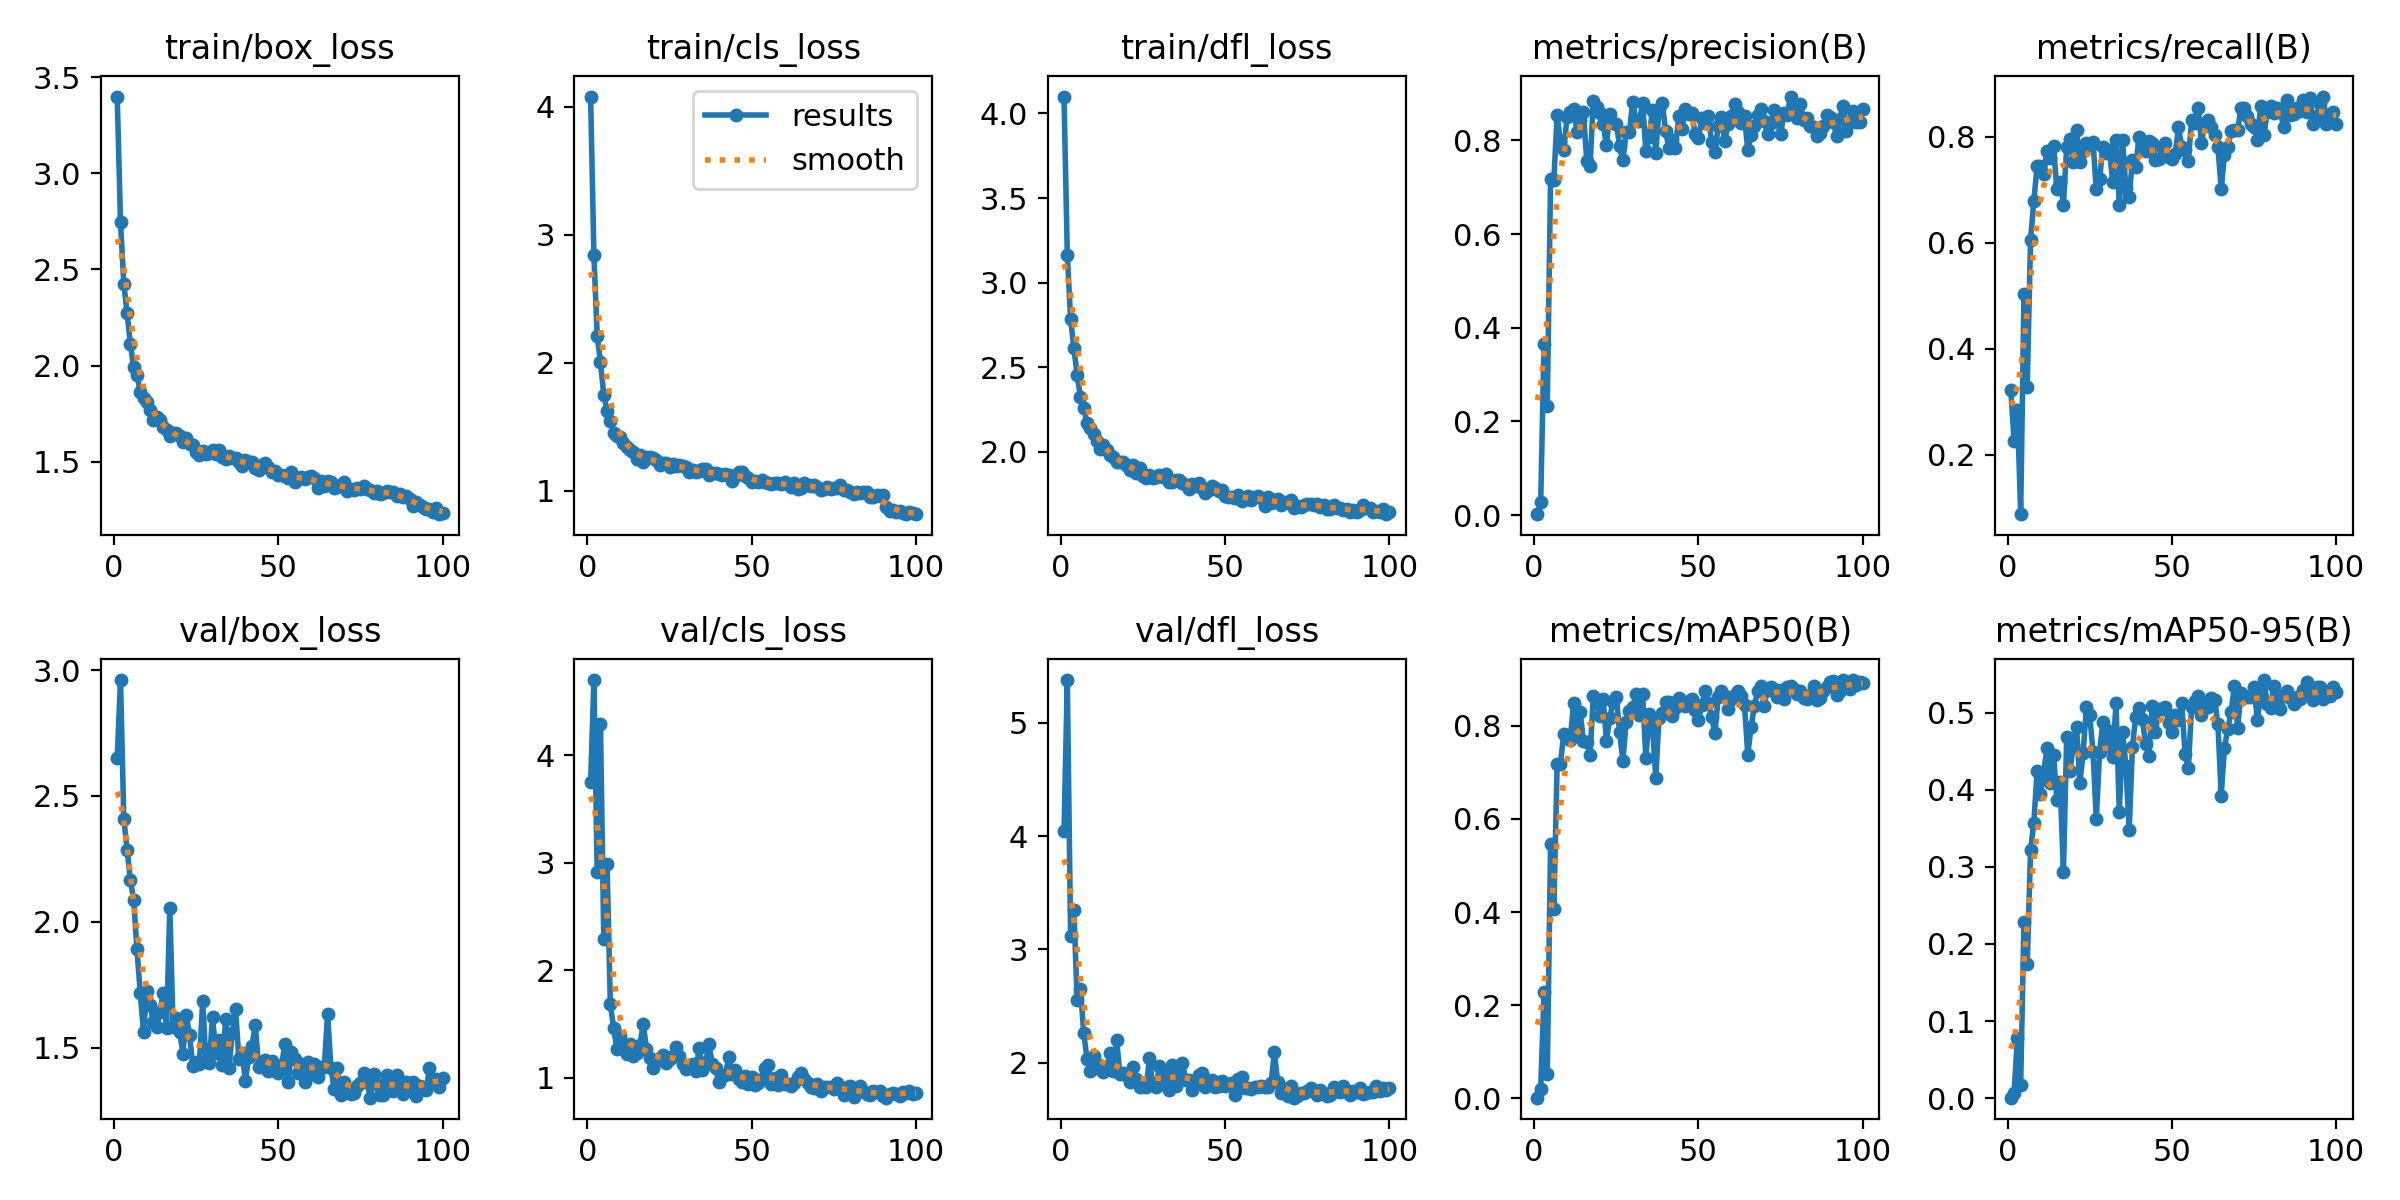

In [14]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [15]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['stamp']

In [16]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [17]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.44839380783535276
mAP 50 0.824539154828693
mAP 75 0.41753531957755163


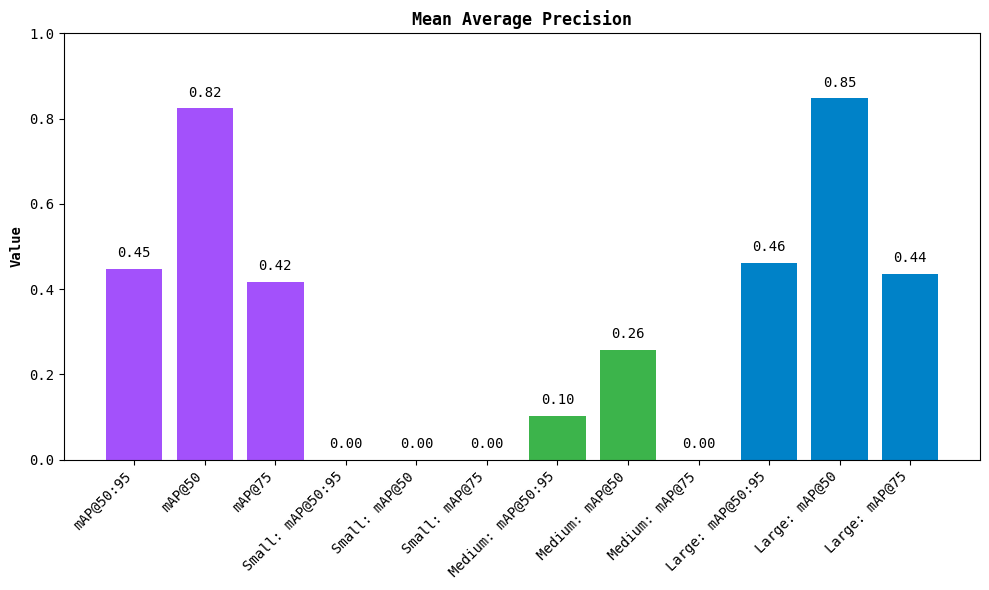

In [18]:
map.plot()

## Run inference with fine-tuned YOLOv12 model

In [19]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

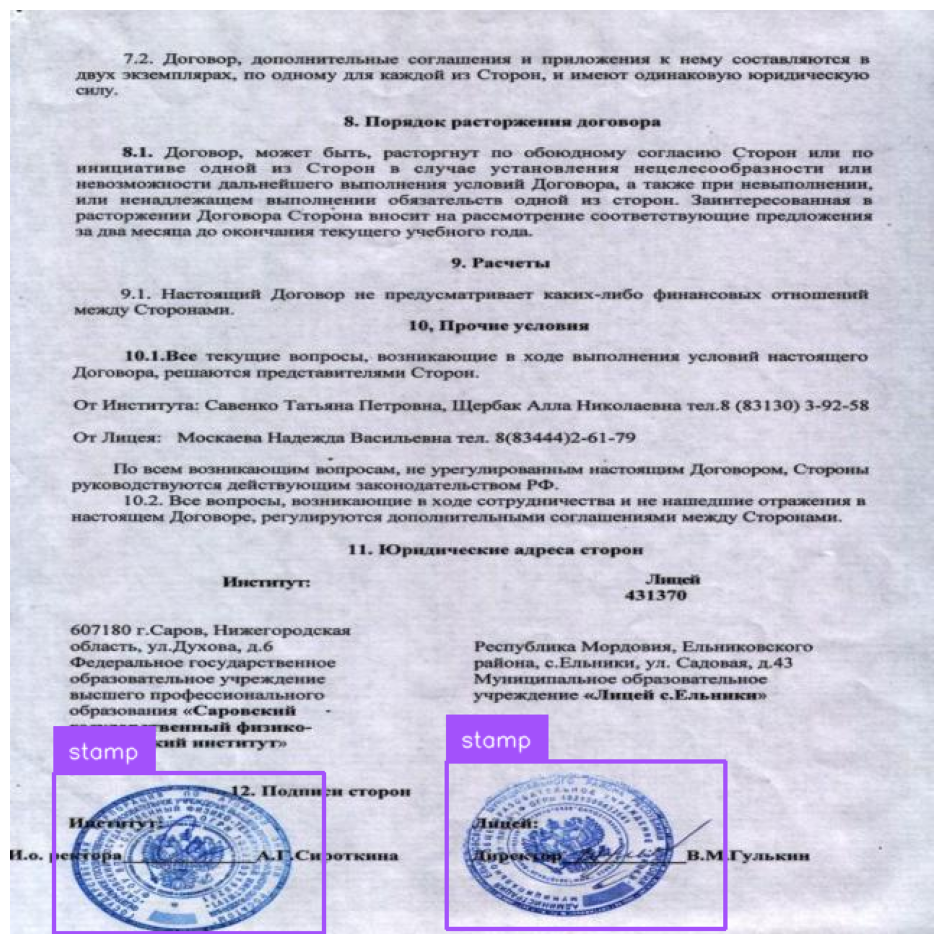

In [20]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [23]:
import os
import cv2
import supervision as sv
from ultralytics import YOLO
import numpy as np

# Load your trained model
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

# Define the base folder and output folder
base_folder = f"{dataset.location}"
output_folder = "extracted_bounding_boxes"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process all datasets: train, test, valid
for dataset_type in ["train", "test", "valid"]:
    input_folder = os.path.join(base_folder, dataset_type, "images")

    # Skip if folder doesn't exist
    if not os.path.exists(input_folder):
        print(f"Skipping {dataset_type} - folder not found: {input_folder}")
        continue

    # Create subfolder for each dataset type
    output_subfolder = os.path.join(output_folder, dataset_type)
    os.makedirs(output_subfolder, exist_ok=True)

    # Get all image files from the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    print(f"Processing {len(image_files)} images from {dataset_type} set...")

    for idx, image_file in enumerate(image_files):
        # Load image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error loading image: {image_path}")
            continue

        # Get base filename without extension
        base_name = os.path.splitext(image_file)[0]

        # Run inference with YOLO model
        results = model(image, verbose=False)[0]

        # Convert to supervision Detections format and apply NMS
        detections = sv.Detections.from_ultralytics(results).with_nms()

        # If no detections found, continue to next image
        if len(detections) == 0:
            print(f"No detections in image: {image_file}")
            continue

        # Extract each bounding box as a separate image
        for i in range(len(detections)):
            # Get coordinates correctly
            x1, y1, x2, y2 = int(detections.xyxy[i][0]), int(detections.xyxy[i][1]), int(detections.xyxy[i][2]), int(detections.xyxy[i][3])

            # Get class id and confidence
            class_id = detections.class_id[i]
            confidence = detections.confidence[i]

            # Get class name
            class_name = results.names[class_id]

            # Extract the bounding box region
            bbox_image = image[y1:y2, x1:x2]

            # Generate output filename
            output_filename = f"{base_name}_box{i+1}_{class_name}_{confidence:.2f}.jpg"
            output_path = os.path.join(output_subfolder, output_filename)

            # Save the bounding box image
            cv2.imwrite(output_path, bbox_image)

        if (idx+1) % 10 == 0:
            print(f"Processed {idx+1}/{len(image_files)} images in {dataset_type} set")

print(f"All bounding boxes have been extracted and saved to {output_folder} folder")

Processing 1422 images from train set...
Processed 10/1422 images in train set
Processed 20/1422 images in train set
Processed 30/1422 images in train set
Processed 40/1422 images in train set
Processed 50/1422 images in train set
Processed 60/1422 images in train set
Processed 70/1422 images in train set
Processed 80/1422 images in train set
Processed 90/1422 images in train set
Processed 100/1422 images in train set
No detections in image: p179_002_jpg.rf.02c44efa4d769588f447aa3207c3b7b3.jpg
Processed 110/1422 images in train set
Processed 120/1422 images in train set
Processed 130/1422 images in train set
Processed 140/1422 images in train set
Processed 150/1422 images in train set
No detections in image: p179_002_jpg.rf.ba9481b66bc2d08bb619c78623095a6a.jpg
Processed 160/1422 images in train set
Processed 170/1422 images in train set
No detections in image: ses_visnovok_poroshkoobraznye-2_jpg.rf.5985f9579f46c72fd2957897fdd7a38c.jpg
No detections in image: pasport-ballon-4-str__1-760

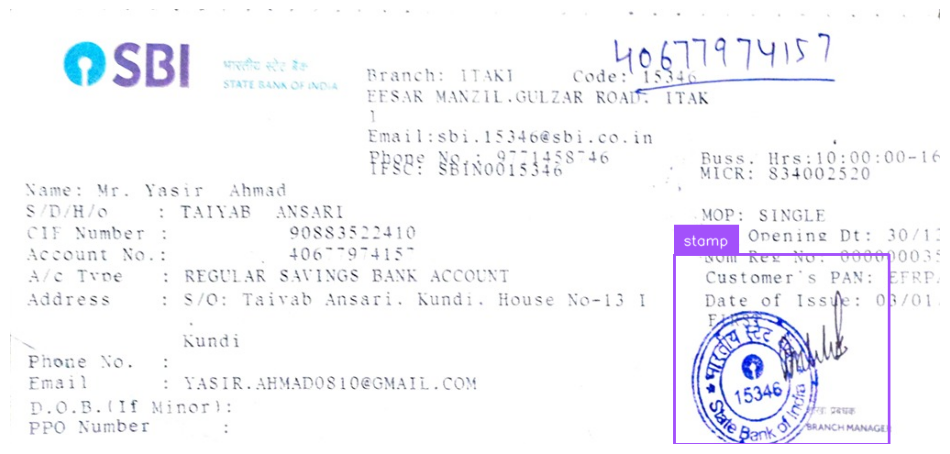

In [25]:
# prompt: get prediction for a single image

# Load your trained model
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

# Provide the path to your image
image_path = "/content/1.jpg" #@param {type:"string"}

# Load the image
image = cv2.imread(image_path)

# Check if image loaded correctly
if image is None:
    print(f"Error loading image: {image_path}")
else:
    # Run inference
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results).with_nms()

    # Annotate and display
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    sv.plot_image(annotated_image)
